#**ETAPA I: COMPRENSIÓN DEL NEGOCIO**

##**Contexto**:

Geografía y Clima
Australia es uno de los países más extensos del mundo y el continente más seco y llano. La mitad occidental es una meseta árida con un clima predominantemente desértico y semiárido, mientras que el norte tiene un clima tropical. Las tierras más fértiles y de clima templado se encuentran en el sureste y suroeste. La Gran Cordillera Divisoria, que se extiende por más de 3.500 km, es la principal formación montañosa.

Demografía y Ciudades
Australia tiene más de 25 millones de habitantes, con casi el 90% viviendo en zonas urbanas. Las ciudades principales son:

Sídney: 5,73 millones de habitantes, centro industrial y puerto comercial.
Melbourne: 5,19 millones.
Brisbane: 2,56 millones.
Perth: 2,38 millones.
Adelaida: 1,41 millones.
Economía
El sector minero es crucial, representando el 10% del PIB, con un valor de 148.000 millones AUD y exportaciones de 299.000 millones AUD esperadas para 2019-20. Australia es uno de los principales exportadores de minerales como bauxita, alúmina, mineral de hierro, zinc, carbón y gas natural licuado.

Fenómenos Naturales
Australia enfrenta diversos fenómenos naturales extremos debido a su diversidad climática, incluyendo sequías, inundaciones, ciclones tropicales, vendavales, incendios forestales y ocasionalmente tornados.

Características Climáticas
Norte: Clima tropical con dos estaciones (seca en invierno y húmeda en verano).
Centro: Clima desértico.
Sureste y Suroeste: Clima templado con cuatro estaciones.
Temperaturas: Varían de 27°C en el norte a 13°C en el sur, con máximas de 38°C en el centro.
Precipitaciones: Muy escasas en el interior y más abundantes en las zonas costeras.
Distribución Territorial
Australia se divide en seis estados (New South Wales, Victoria, Queensland, South Australia, Western Australia y Tasmania) y dos territorios continentales (Northern Territory y Australian Capital Territory). Su vasta extensión y diversidad geográfica y climática condicionan el tráfico de personas, mercancías y servicios.

![texto alternativo](https://drive.google.com/uc?id=1WFSAucz7RjzZf4z_J9ZkdSG3LR9Qz4aq)


##**Diccionario de variables**

* Fecha: Fecha de la observación
* Ubicacion: Ubicación de la estación meteorológica
* MinTemp: Temperatura mínima en grados Celsius
* MaxTemp: Temperatura máxima en grados Celsius
* Lluvia: Cantidad de lluvia registrada ese día en mm.
* Evaporacion: Evaporación (mm) en 24 horas
* Sol: Número de horas de sol brillante en el día
* DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.
* VelRafaga: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.
* Dir9am: Dirección del viento a las 9am
* Dir3pm: Dirección del viento a las 3pm
* Vel9am: Velocidad (km/hr) del viento a las 9am
* Vel3pm: Velocidad (km/hr) del viento a las 3pm
* Hum9am: Porcentaje de humedad a las 9am
* Hum3pm: Porcentaje de humedad a las 3pm
* Pres9am: Presión atmosférica (hpa) a nivel del mar a las 9am
* Pre3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm
* Nub9am: Fracción del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.
* Nub3pm: Fracción del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.
* Temp9am: Temperatura en grados Celsius a las 9am
* Temp3pm: Temperatura en grados Celsius a las 3pm
* LluviaHoy: Variable indicadora que toma el valor 1 si la precipitación es en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no.
* RISK_MM: La cantidad de lluvia. Una especie de medida del "riesgo".
* LluviaMan: Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.

##Objetivos claves.

Este proyecto tiene como objetivo aplicar técnicas de minería de datos para predecir la ocurrencia de lluvia en distintas ubicaciones de Australia. Usaremos modelos de clasificación como árboles de decisión, regresión logística y redes neuronales para identificar los factores meteorológicos más influyentes.

* Desarrollar un modelo predictivo para determinar si lloverá al día siguiente en diversas ubicaciones de Australia.
* Implementar y comparar distintos algoritmos de machine learning (regresión logística, árboles de decisión, redes neuronales, etc.) para mejorar la precisión de las predicciones climáticas.
* Determinar cuáles son las variables meteorológicas más importantes que influyen en la ocurrencia de lluvia, como temperatura, humedad, presión atmosférica, etc.
* Cuantificar y predecir la cantidad de lluvia registrada en milímetros para evaluar el riesgo de lluvias intensas y sus posibles impactos.

#**ETAPA II: COMPRENSIÓN DE LOS DATOS**

In [ ]:
 #Cargamos las librerías de Python que nos servirán para todo esto

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Visualización
from seaborn import load_dataset
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot
from sklearn.impute import KNNImputer
import joblib

import math #para item 4

import warnings #Advertencias
warnings.filterwarnings('ignore')

In [ ]:
#Importamos el archivo csv y aplicamos delimiter
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Datos/weatherAUS.csv", delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**1. Exploración inicial**

In [ ]:
#Filas x Columnas
print(data.shape)

(142193, 24)


Poseemos una base de datos de 142193 datos y 24 variables

Nombres de cada variable del dataset

---

In [ ]:
#Lista de columnas
list(data.columns.values)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

### Visualizacion del dataset

Primeros 5 registros del dataset

---

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Ultimos 5 registros del DataSet

---

In [ ]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


5 Registros aleatorios del DataSet

---

In [ ]:
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
110993,2014-11-09,Witchcliffe,7.6,24.1,0.0,NaN,NaN,SSE,46.0,SE,...,59.0,1020.3,1015.5,NaN,NaN,17.9,22.7,No,0.0,No
79013,2009-11-22,Dartmoor,13.4,18.8,12.8,1.8,7.2,WSW,54.0,SW,...,69.0,1005.1,1010.9,NaN,NaN,14.1,16.8,Yes,0.0,No
56519,2016-12-25,Ballarat,15.6,33.9,0.0,NaN,NaN,NNE,52.0,NNE,...,21.0,1013.9,1011.1,NaN,NaN,24.5,32.2,No,0.0,No
119359,2013-04-07,Perth,17.7,31.7,0.0,7.0,9.8,SE,31.0,ESE,...,35.0,1018.3,1013.7,1.0,1.0,21.5,30.7,No,0.0,No
101214,2012-06-23,Nuriootpa,0.9,11.6,1.4,0.2,6.3,W,41.0,ESE,...,69.0,1028.3,1027.9,2.0,6.0,5.4,11.0,Yes,0.4,No


Transformamos A DataFrame

---

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

17 variables de tipo float

7  variables de tipo object


---

Transformamos en este espacio la columna "Date" para poder tratarla de mejor manera y evitar cometer errores.

In [ ]:
# Convertir la columna 'date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Crear columnas separadas para año, mes y día
df['Año'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)

##**2. Análisis Estadístico**

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Año,Mes,Dia
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


* Count: Numero de filas en cada columna.
* Mean: Media de los valores en la columna.
* STD: Desviacion estandar mide la dispersion de los datos.
* Min: Valor minimo de cada columna.
* 25%: El 25% o percentil 1 representa el valor por debajo del porcentaje.
* 50%: El 50% o percentil 2 representa a la mediana o conjunto de datos por debajo de el porcentaje.
* 75%: El 75% o percentil 3 representa el conjunto de datos por debajo de el porcentaje.
* Max: Representa el valor maximo de cada columna.

### Datos faltantes o perdidos.

In [ ]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Año                  0
Mes                  0
Dia                  0
dtype: int64

Podemos observar que hay muchisima cantidad de datos nulos, se corregira esto en etapas posteriores.

### Graficos.

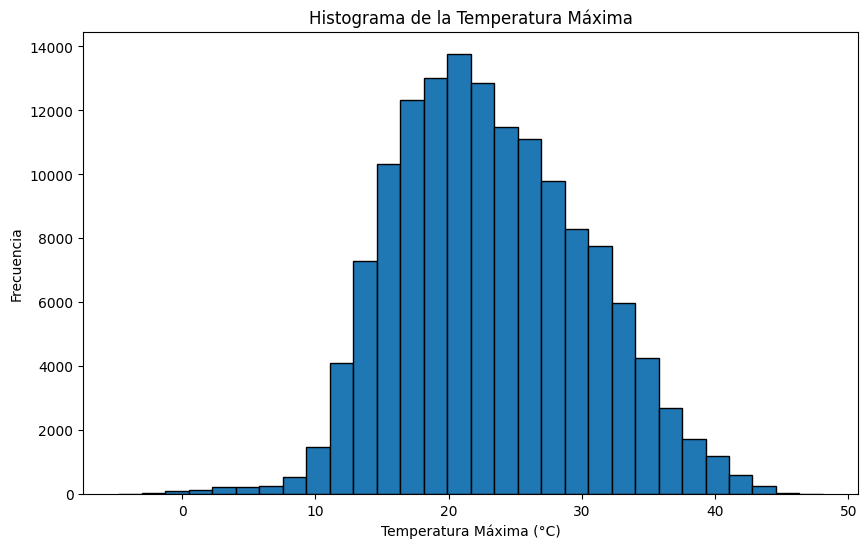

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['MaxTemp'], bins=30, edgecolor='black')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Temperatura Máxima')
plt.show()

En el siguiente Histograma podemos observar las temperaturas maximas y que posee entre una distribucion normal ya que tiene la forma de la campana de gauss y la mayoria de valores agrupan alrededor de la media y disminuyen a medida que se alejan de la misma.


Text(0.5, 1.0, 'Función de densidad la temperatura minima ')

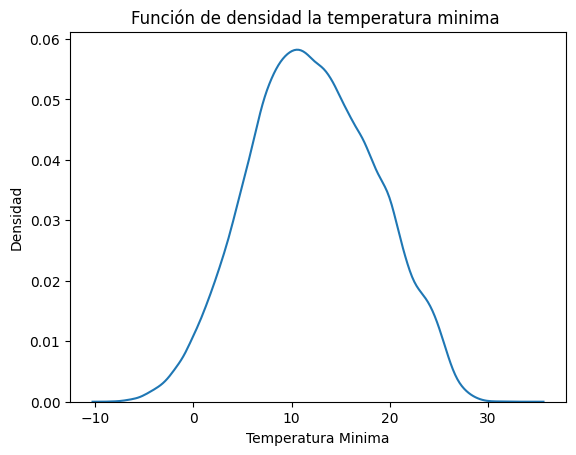

In [ ]:
kdeplot(df['MinTemp'])
plt.xlabel("Temperatura Minima")
plt.ylabel("Densidad")
plt.title("Función de densidad la temperatura minima ")

El siguiente grafico de densidad muestra la temperatura minima, podemos observar que:
* La mayor densidad de encuentra en los 10°.
* Posee un sesgo positivo ya que su cola va hacia la derecha.

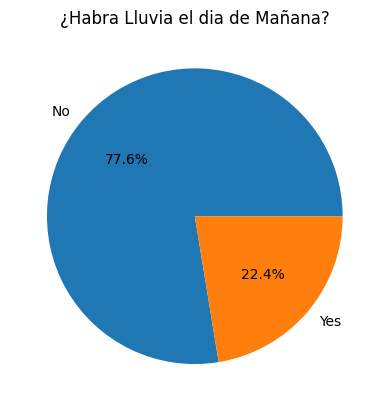

In [ ]:
frecuencia = df['RainTomorrow'].value_counts()
plt.pie(frecuencia, labels=frecuencia.index, autopct='%1.1f%%')
plt.title("¿Habra Lluvia el dia de Mañana?")
plt.show()

El siguiente grafico de torta muestra la probabilidad de lluvia del dia de mañana.

* Hay un 22,4% de probabilidad que llueva el dia de mañana.
* Hay un 77.6% de probabilidad que NO llueva el dia de mañana.

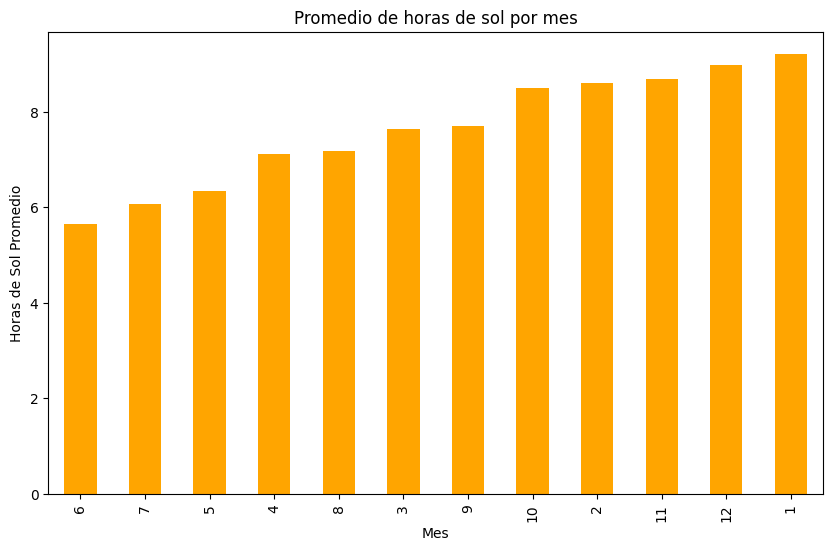

In [ ]:
avg_month = df.groupby('Mes')['Sunshine'].mean().sort_values(ignore_index=False)

plt.figure(figsize=(10, 6))
avg_month.plot(kind='bar', color='orange')
plt.xlabel('Mes')
plt.ylabel('Horas de Sol Promedio')
plt.title('Promedio de horas de sol por mes')
plt.show()

El siguiente grafico muestra el promedio de horas de sol por mes, podemos observar que:
* El mes que mas horas promedio de sol hubo fue el mes de Enero.
* El con menor cantidad de horas de sol promedio fue el mes de Junio.

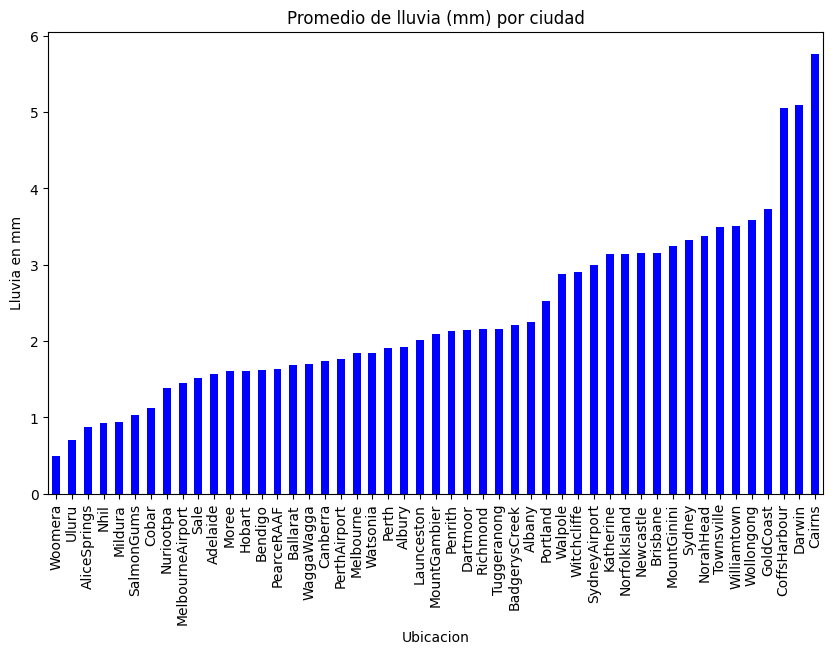

In [ ]:
avg_month = df.groupby('Location')['Rainfall'].mean().sort_values(ignore_index=False)

plt.figure(figsize=(10, 6))
avg_month.plot(kind='bar', color='blue')
plt.xlabel('Ubicacion')
plt.ylabel('Lluvia en mm')
plt.title('Promedio de lluvia (mm) por ciudad')
plt.show()

El siguiente grafico muestra el promedio de lluvia en MM por ciudad donde podemos analizar que:
* La ciudad con mayor promedio de lluvia es la ciudad Cairns.
* La ciudad con menor promedio de lluvia es la ciudad de Woomera.

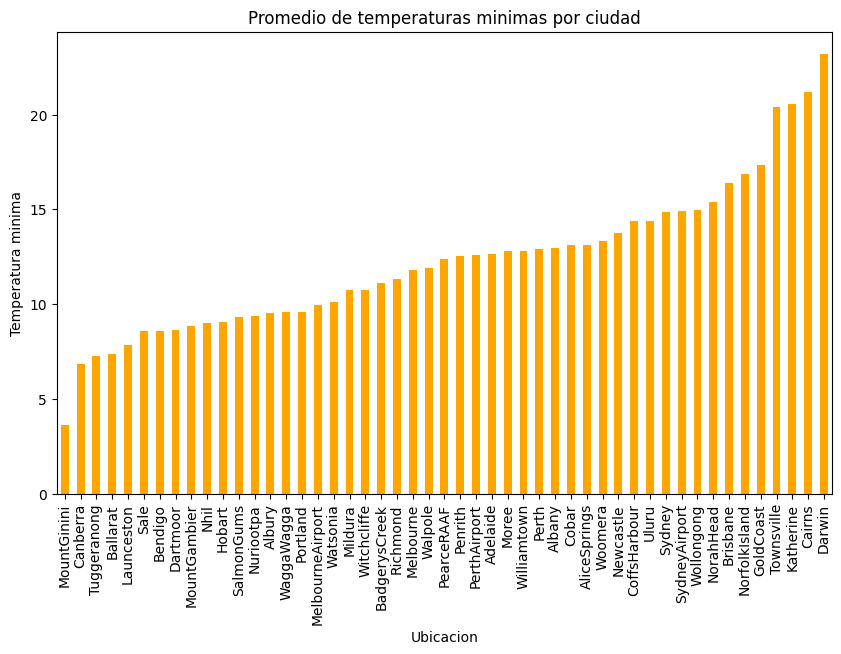

In [ ]:
avg_month = df.groupby('Location')['MinTemp'].mean().sort_values(ignore_index=False)

plt.figure(figsize=(10, 6))
avg_month.plot(kind='bar', color='orange')
plt.xlabel('Ubicacion')
plt.ylabel('Temperatura minima')
plt.title('Promedio de temperaturas minimas por ciudad')
plt.show()

En el siguiente grafico podemos observar el promedio de temperaturas minimas por ciudad donde podemos analizar que:
* La ciudad con mayor temperatura minima promedio es la ciudad de Darwin.
* La ciudad con menor temperatura minima promedio es la ciudad de MountGinini.

##**3. Medidas de Tendencia Central**

###**Media**

Gracias a la media podemos interpretar que:
* La temperatura minima promedio es de 12,1°.
* La temperatura maxima promedio es de 23,2°.
* la temperatura promedio a las 9am es de 16°, etc..

In [ ]:
df_media = df.select_dtypes(include=['float'])
v_media = df_media.mean()
print(v_media)

MinTemp            12.186400
MaxTemp            23.226784
Rainfall            2.349974
Evaporation         5.469824
Sunshine            7.624853
WindGustSpeed      39.984292
WindSpeed9am       14.001988
WindSpeed3pm       18.637576
Humidity9am        68.843810
Humidity3pm        51.482606
Pressure9am      1017.653758
Pressure3pm      1015.258204
Cloud9am            4.437189
Cloud3pm            4.503167
Temp9am            16.987509
Temp3pm            21.687235
RISK_MM             2.360682
dtype: float64


###**Mediana**


Gracias a la mediana podemos inferir que:
* La mitad de la temperatura de los datos es de 12°
* La temperatura maxima de 22,6°, etc...

In [ ]:
df_mediana = df.select_dtypes(include=['float'])
v_mediana = df_mediana.median()
print(v_mediana)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RISK_MM             0.0
dtype: float64


###**Moda**

Gracias a la moda podemos interpretar que el dato que mas se repite en los datos es:
* Temperatura Minima de 9,6°.
* Temperatura Maxima de 20°.
* Temperatura a las 9 am que mas se repite es de 17°.
* Temperatura a las 3 pm que mas se repite es de 20°.

In [ ]:
df.mode().iloc[0]

Location         Canberra
MinTemp               9.6
MaxTemp              20.0
Rainfall              0.0
Evaporation           4.0
Sunshine              0.0
WindGustDir             W
WindGustSpeed        35.0
WindDir9am              N
WindDir3pm             SE
WindSpeed9am          9.0
WindSpeed3pm         13.0
Humidity9am          99.0
Humidity3pm          52.0
Pressure9am        1016.4
Pressure3pm        1015.5
Cloud9am              7.0
Cloud3pm              7.0
Temp9am              17.0
Temp3pm              20.0
RainToday              No
RISK_MM               0.0
RainTomorrow           No
Año                2016.0
Mes                   5.0
Dia                     1
Name: 0, dtype: object

##**4. Medidas de Dispersion**

###**Desviacion Estandar**

In [ ]:
df_std = df.select_dtypes(include=['float'])
v_std = df_std.std()
print(v_std)

MinTemp           6.403283
MaxTemp           7.117618
Rainfall          8.465173
Evaporation       4.188537
Sunshine          3.781525
WindGustSpeed    13.588801
WindSpeed9am      8.893337
WindSpeed3pm      8.803345
Humidity9am      19.051293
Humidity3pm      20.797772
Pressure9am       7.105476
Pressure3pm       7.036677
Cloud9am          2.887016
Cloud3pm          2.720633
Temp9am           6.492838
Temp3pm           6.937594
RISK_MM           8.477969
dtype: float64


###**Varianza**

In [ ]:
df_var = df.select_dtypes(include=['float'])
v_var = df_var.var()
print(v_var)

MinTemp           41.002029
MaxTemp           50.660488
Rainfall          71.659153
Evaporation       17.543838
Sunshine          14.299931
WindGustSpeed    184.655506
WindSpeed9am      79.091445
WindSpeed3pm      77.498884
Humidity9am      362.951747
Humidity3pm      432.547314
Pressure9am       50.487785
Pressure3pm       49.514820
Cloud9am           8.334859
Cloud3pm           7.401841
Temp9am           42.156950
Temp3pm           48.130209
RISK_MM           71.875960
dtype: float64


##**5. Medidas de tendencia No central**

Aqui Observamos el boxplot de la categoria MinTemp

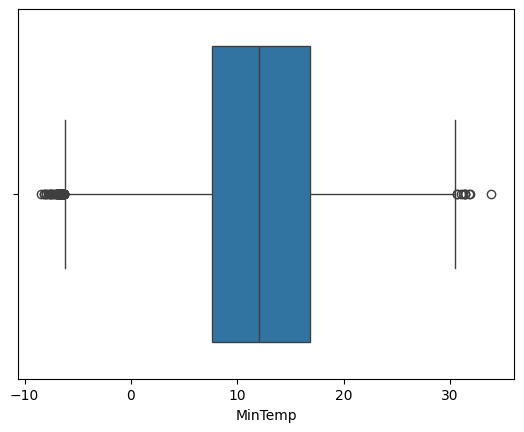

In [ ]:
sb.boxplot(x=df['MinTemp'])
plt.show()

MinTemp

* Valor Minimo: Esta alreredor de los -6 grados (exceptuando los datos atipicos).
* Valor Maximo: Esta en los 30 grados (Exceptuando datos atipicos).
* El 25% o Q1: Esta alrededor de los 8 grados.
* El 50$ o Q2: Esta alrededor de los 12 grados.
* El 75% o Q3: Esta alrededor de los 17 grados.


Aqui Observamos el boxplot de la categoria MaxTemp

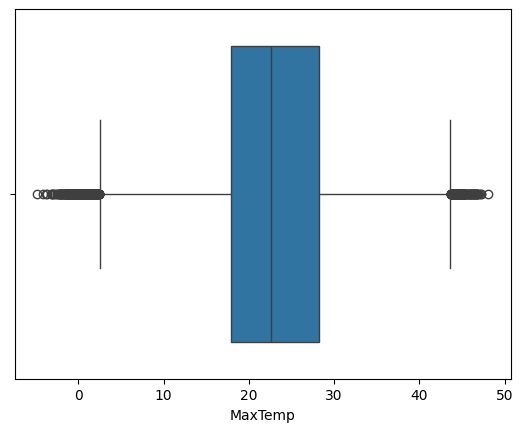

In [ ]:
sb.boxplot(x=df['MaxTemp'])
plt.show()

MaxTemp

* Valor Minimo: Esta alreredor de los 3 grados (exceptuando los datos atipicos).
* Valor Maximo: Esta alrededor 43 grados (Exceptuando datos atipicos).
* El 25% o Q1: Esta alrededor de los 19 grados.
* El 50$ o Q2: Esta alrededor de los 22 grados.
* El 75% o Q3: Esta alrededor de los 29 grados.


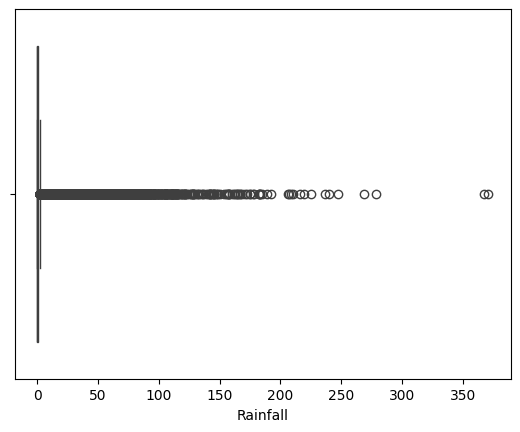

In [ ]:
sb.boxplot(x=df['Rainfall'])
plt.show()

El siguiente boxplot contiene muchos datos atipicos provocando que se dificulte su comprension.

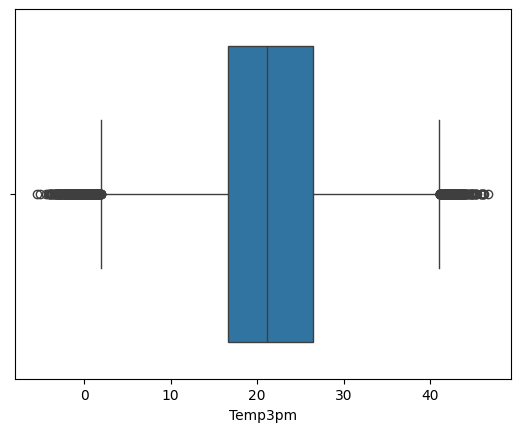

In [ ]:
sb.boxplot(x=df['Temp3pm'])
plt.show()

Temp3pm

* Valor Minimo: Esta alreredor de los 3 grados (exceptuando los datos atipicos).
* Valor Maximo: Esta alrededor 43 grados (Exceptuando datos atipicos).
* El 25% o Q1: Esta alrededor de los 16 grados.
* El 50$ o Q2: Esta alrededor de los 22 grados.
* El 75% o Q3: Esta alrededor de los 27 grados.


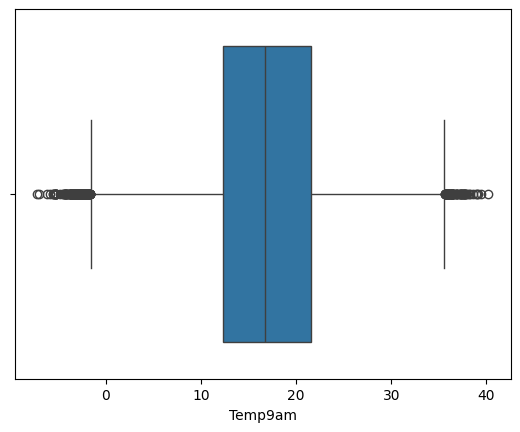

In [ ]:
sb.boxplot(x=df['Temp9am'])
plt.show()

Temp9am

* Valor Minimo: Esta alreredor de los -3 grados (exceptuando los datos atipicos).
* Valor Maximo: Esta alrededor 36 grados (Exceptuando datos atipicos).
* El 25% o Q1: Esta alrededor de los 12 grados.
* El 50$ o Q2: Esta alrededor de los 17 grados.
* El 75% o Q3: Esta alrededor de los 22 grados.

#**ETAPA III: Preparacion**

##**1. Limpieza**

###**1.1. Tratamiento de Datos Nulos (Missing)**

Podemos observar que poseemos una gran cantidad de datos nulos por lo que los trataremos con el metodo de knn los mayores al 10% de datos nulos.

In [ ]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Año                  0
Mes                  0
Dia                  0
dtype: int64

Decidimos eliminar los datos NaN de las siguientes columnas debido a que no presentarian un gran inconveniente ya que no serian una parte importante de datos, serrian menos del 10% de datos.

In [ ]:
df = df.dropna(subset=["MinTemp", "MaxTemp","Rainfall","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","Humidity9am","Humidity3pm","Temp9am","Temp3pm","RainToday"])

En cambio para las que superaban esos valores decidimos aplicar el metodo de KNN para remplazar los valores nulos por valores generados por el metodo.

In [ ]:
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos según lo desees

#Lista de las columnas que deseas imputar con KNN
columns_to_impute = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm','Pressure9am','Pressure3pm']

#Imputamos los valores nulos en las columnas especificadas directamente en el DataFrame
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

Ahora podemos observar que nuestro Dataframe quedo exento de datos nulos.

In [ ]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Año              0
Mes              0
Dia              0
dtype: int64

##**2. Transformacion**

Decidimos transformar la columna Date, separandola por dia, mes y año para al momento de realizar graficos poder hacerlo en base a año, mes o dia especificamente

In [ ]:
# Convertir la columna 'date' a tipo datetime
#df['Date'] = pd.to_datetime(df['Date'])

# Crear columnas separadas para año, mes y día
#df['Año'] = df['Date'].dt.year
#df['Mes'] = df['Date'].dt.month
#df['Dia'] = df['Date'].dt.day

#df.drop('Date', axis=1, inplace=True)

Podemos observar que la columna Location es una variable categorica nominal por lo que la transformaremos a numerica dandole valores a cada nombre de ciudad

In [ ]:
# Creamos una variable para visualizar los nombres de las ciudades
city_names = df['Location'].unique()

# Mostrar los nombres de las ciudades
print("Nombres de todas las ciudades en el dataset:")
for city in city_names:
    print(city)

Nombres de todas las ciudades en el dataset:
Albury
BadgerysCreek
Cobar
CoffsHarbour
Moree
NorahHead
NorfolkIsland
Penrith
Richmond
Sydney
SydneyAirport
WaggaWagga
Williamtown
Wollongong
Canberra
Tuggeranong
MountGinini
Ballarat
Bendigo
Sale
MelbourneAirport
Melbourne
Mildura
Nhil
Portland
Watsonia
Dartmoor
Brisbane
Cairns
GoldCoast
Townsville
Adelaide
MountGambier
Nuriootpa
Woomera
Witchcliffe
PearceRAAF
PerthAirport
Perth
SalmonGums
Walpole
Hobart
Launceston
AliceSprings
Darwin
Katherine
Uluru


In [ ]:
df['Location'].replace({
       'Albury': 1, 'BadgerysCreek': 2, 'Cobar': 3, 'CoffsHarbour': 4, 'Moree': 5, 'Newcastle': 6, 'NorahHead': 7, 'NorfolkIsland': 8, 'Penrith': 9, 'Richmond': 10, 'Sydney': 11,
       'SydneyAirport': 12, 'WaggaWagga': 13, 'Williamtown': 14, 'Wollongong': 15, 'Canberra': 16, 'Tuggeranong': 17, 'MountGinini': 18, 'Ballarat': 19, 'Bendigo': 20,
       'Sale': 21, 'MelbourneAirport': 22, 'Melbourne': 23, 'Mildura': 24, 'Nhil': 25, 'Portland': 26, 'Watsonia': 27, 'Dartmoor': 28, 'Brisbane': 29, 'Cairns': 30,
       'GoldCoast': 31, 'Townsville': 32, 'Adelaide': 33, 'MountGambier': 34, 'Nuriootpa': 35, 'Woomera': 36, 'Albany': 37, 'Witchcliffe': 38, 'PearceRAAF': 39, 'PerthAirport': 40,
       'Perth': 41, 'SalmonGums': 42, 'Walpole': 43, 'Hobart': 44, 'Launceston': 45, 'AliceSprings': 46, 'Darwin': 47, 'Katherine': 48, 'Uluru': 49
    }, inplace=True)

Transformando datos de la variable WINDGUSTDIR que es una variable categorica, aplicandole un numero a cada dato.
Realizaremos exactamente lo mismo con las variables WindDir9am y WindDir3pm

In [ ]:
#Reemplazando valores por orden
df['WindGustDir'].replace({
    'W':1, 'WNW':2, 'WSW':3, 'NE':4, 'NNW':5, 'N':6, 'NNE':7, 'SW':8, 'ENE':9, 'SSE':10,
     'S':11, 'NW':12, 'SE':13, 'ESE':14, 'E':15, 'SSW':16
    }, inplace=True)

In [ ]:
#Reemplazando valores por orden
df['WindDir9am'].replace({
    'W':1, 'WNW':2, 'WSW':3, 'NE':4, 'NNW':5, 'N':6, 'NNE':7, 'SW':8, 'ENE':9, 'SSE':10,
     'S':11, 'NW':12, 'SE':13, 'ESE':14, 'E':15, 'SSW':16
    }, inplace=True)

In [ ]:
#Reemplazando valores por orden
df['WindDir3pm'].replace({
    'W':1, 'WNW':2, 'WSW':3, 'NE':4, 'NNW':5, 'N':6, 'NNE':7, 'SW':8, 'ENE':9, 'SSE':10,
     'S':11, 'NW':12, 'SE':13, 'ESE':14, 'E':15, 'SSW':16
    }, inplace=True)

Ahora a las variables RainToday y RainTomorrow al ser categoricas binarias les aplicaremos codigo para darles valores numericos

In [ ]:
#Reemplazando valores
df['RainToday'].replace({
    'Yes':1, 'No':0,
    }, inplace=True)

In [ ]:
#Reemplazando valores
df['RainTomorrow'].replace({
    'Yes':1, 'No':0,
    }, inplace=True)

Verificamos la transformacion

In [ ]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Año,Mes,Dia
0,1,13.4,22.9,0.6,4.86,8.18,1,44.0,1,2,...,8.0,6.6,16.9,21.8,0,0.0,0,2008,12,1
1,1,7.4,25.1,0.0,7.88,8.42,2,44.0,5,3,...,5.0,4.4,17.2,24.3,0,0.0,0,2008,12,2
2,1,12.9,25.7,0.0,6.54,9.04,3,46.0,1,3,...,6.4,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,1,9.2,28.0,0.0,5.08,10.34,4,24.0,13,15,...,2.4,2.2,18.1,26.5,0,1.0,0,2008,12,4
4,1,17.5,32.3,1.0,6.60,6.48,1,41.0,9,12,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5
5,1,14.6,29.7,0.2,6.96,7.54,2,56.0,1,1,...,3.8,3.8,20.6,28.9,0,0.0,0,2008,12,6
6,1,14.3,25.0,0.0,6.00,9.92,1,50.0,8,1,...,1.0,7.0,18.1,24.6,0,0.0,0,2008,12,7
7,1,7.7,26.7,0.0,6.20,9.60,1,35.0,10,1,...,0.2,1.6,16.3,25.5,0,0.0,0,2008,12,8
8,1,9.7,31.9,0.0,6.60,4.62,5,80.0,13,12,...,5.4,6.0,18.3,30.2,0,1.4,1,2008,12,9
9,1,13.1,30.1,1.4,3.40,4.12,1,28.0,11,10,...,5.4,5.6,20.1,28.2,1,0.0,0,2008,12,10


Podemos ver que no poseemos variables Categoricas si no que ahora solo poseemos variables numericas.

##**3. Correlacion**

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Año,Mes,Dia
Location,1.000000,0.066487,0.114091,-0.020415,0.061369,0.062364,0.072495,0.040399,0.072898,0.024426,0.046673,0.023799,-0.143082,-0.100222,-0.098151,-0.104347,-0.046303,-0.044219,0.117411,0.112410,-0.018440,-0.018105,-0.013148,0.004453,0.003268,0.000890
MinTemp,0.066487,1.000000,0.735208,0.100733,0.388250,0.078394,0.129178,0.145779,0.124547,0.100279,0.142852,0.158680,-0.219670,0.001702,-0.412164,-0.426335,0.053530,0.013198,0.897739,0.711301,0.044928,0.123153,0.078922,0.027506,-0.210743,0.000031
MaxTemp,0.114091,0.735208,1.000000,-0.079866,0.488417,0.393910,0.118326,0.042114,0.147128,0.049758,-0.011697,0.027447,-0.511890,-0.514036,-0.294907,-0.388073,-0.241391,-0.235814,0.890629,0.984826,-0.239148,-0.047846,-0.166291,0.042400,-0.167732,-0.002958
Rainfall,-0.020415,0.100733,-0.079866,1.000000,-0.045944,-0.200058,0.008654,0.130865,-0.010861,0.009966,0.085824,0.061522,0.237867,0.261134,-0.163383,-0.122895,0.173840,0.153700,0.003287,-0.083248,0.501052,0.316549,0.238865,-0.010213,-0.032879,0.001742
Evaporation,0.061369,0.388250,0.488417,-0.045944,1.000000,0.332220,0.061365,0.159678,0.090981,0.026240,0.132533,0.091197,-0.403576,-0.317037,-0.281480,-0.309742,-0.181011,-0.179096,0.455536,0.473312,-0.151107,-0.032121,-0.086976,0.040340,-0.031329,-0.004713
Sunshine,0.062364,0.078394,0.393910,-0.200058,0.332220,1.000000,0.056653,-0.063830,0.092728,0.018303,-0.029358,-0.004071,-0.398222,-0.501323,0.058094,-0.016066,-0.619382,-0.637139,0.253787,0.412138,-0.281582,-0.237736,-0.351616,-0.009704,0.015649,-0.001700
WindGustDir,0.072495,0.129178,0.118326,0.008654,0.061365,0.056653,1.000000,-0.100781,0.360320,0.484687,0.006345,-0.073990,-0.036008,-0.019605,0.144567,0.138590,-0.033327,-0.060192,0.123746,0.124039,-0.034414,0.005485,-0.059938,0.013875,-0.087247,-0.013440
WindGustSpeed,0.040399,0.145779,0.042114,0.130865,0.159678,-0.063830,-0.100781,1.000000,-0.105598,-0.113651,0.592116,0.677223,-0.178322,-0.012487,-0.425824,-0.382506,0.088791,0.111820,0.110612,0.004118,0.153859,0.161615,0.235302,-0.033024,0.054790,-0.008240
WindDir9am,0.072898,0.124547,0.147128,-0.010861,0.090981,0.092728,0.360320,-0.105598,1.000000,0.299099,-0.007489,-0.069785,-0.068149,-0.070817,0.104461,0.082307,-0.055898,-0.086958,0.134102,0.155120,-0.067608,-0.008593,-0.083157,0.007646,-0.064912,-0.010417
WindDir3pm,0.024426,0.100279,0.049758,0.009966,0.026240,0.018303,0.484687,-0.113651,0.299099,1.000000,0.017695,-0.067921,-0.005146,0.031277,0.168863,0.175205,-0.014235,-0.035259,0.074895,0.050856,-0.013707,0.009093,-0.047303,0.008823,-0.083352,-0.016694


In [ ]:
df.corr_matrix = df.select_dtypes(include=['float'])
corr_matrix = df.corr_matrix.corr()
corr_matrix["MinTemp"].sort_values(ascending=False)

MinTemp          1.000000
Temp9am          0.897739
MaxTemp          0.735208
Temp3pm          0.711301
Evaporation      0.388250
WindSpeed3pm     0.158680
WindGustSpeed    0.145779
WindSpeed9am     0.142852
RISK_MM          0.123153
Rainfall         0.100733
Sunshine         0.078394
Cloud9am         0.053530
Cloud3pm         0.013198
Humidity3pm      0.001702
Humidity9am     -0.219670
Pressure9am     -0.412164
Pressure3pm     -0.426335
Name: MinTemp, dtype: float64

In [ ]:
c_Rain = df['RainToday'].corr(df['RainTomorrow'])
print("Correlacion entre que llueva hoy y siga lloviendo mañana:", c_Rain)

Correlacion entre que llueva hoy y siga lloviendo mañana: 0.313566584947342


In [ ]:
c_max_r = df['MaxTemp'].corr(df['RainToday'])
print("Correlacion entre que llueva hoy y siga lloviendo mañana:", c_max_r)

Correlacion entre que llueva hoy y siga lloviendo mañana: -0.23914812955178028


#**ETAPA IV: Modelamiento Supervisados**

##**Regresion**

###**1.Primer Modelo**

Definimos la Variable Objetivo Y

In [ ]:
#Variable dependiente
Y = pd.DataFrame(df['MinTemp'])
Y.head()

,MinTemp
0,13.4
1,7.4
2,12.9
3,9.2
4,17.5


Definimos las Variables Predictoras

In [ ]:
#Variables independientes
X = df.drop(columns=['MinTemp'])
X.head()

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Año,Mes,Dia
0,1,22.9,0.6,4.86,8.18,1,44.0,1,2,20.0,...,8.0,6.6,16.9,21.8,0,0.0,0,2008,12,1
1,1,25.1,0.0,7.88,8.42,2,44.0,5,3,4.0,...,5.0,4.4,17.2,24.3,0,0.0,0,2008,12,2
2,1,25.7,0.0,6.54,9.04,3,46.0,1,3,19.0,...,6.4,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,1,28.0,0.0,5.08,10.34,4,24.0,13,15,11.0,...,2.4,2.2,18.1,26.5,0,1.0,0,2008,12,4
4,1,32.3,1.0,6.60,6.48,1,41.0,9,12,7.0,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


Creamos el Modelo de Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

modelo1 = LinearRegression()

In [ ]:
modelo1.fit(X, Y)

LinearRegression()

In [ ]:
Y_hat = modelo1.predict(X)

In [ ]:
print(Y_hat[0:20])

[[11.98301203]
 [ 9.6161247 ]
 [14.29621685]
 [10.07823841]
 [12.4571973 ]
 [14.19910172]
 [10.84222764]
 [ 7.95422061]
 [10.58690408]
 [14.64843369]
 [13.90955649]
 [12.95113843]
 [15.81120145]
 [13.01097843]
 [13.45661624]
 [14.40437295]
 [10.28368544]
 [ 8.28276199]
 [12.46757231]
 [17.17700389]]


**Evaluacion Modelo 1**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

In [ ]:
MAE_1 = mean_absolute_error(Y, Y_hat)
MSE_1 =  mean_squared_error(Y, Y_hat)
RMSE_1 = rmse(Y, Y_hat)
r2_1 = r2_score(Y, Y_hat)

print("MAE: %.2f" % mean_absolute_error(Y, Y_hat))
print("MSE: %.2f" % mean_squared_error(Y, Y_hat))
print("RMSE: %.2f" % rmse(Y, Y_hat))
print('r2: %.2f' % r2_score(Y, Y_hat))

MAE: 1.63
MSE: 4.45
RMSE: 2.11
r2: 0.89


###**2.Segundo Modelo**

Aplicamos normalizacion de datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_normalizado = pd.DataFrame(features, columns = col_names)

In [ ]:
Y = df['MinTemp']
X = df_normalizado.drop(columns=['MinTemp'])
X.head()

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Año,Mes,Dia
0,-1.744059,-0.075972,-0.207028,-0.189521,0.172776,-1.615653,0.247449,-1.688663,-1.386791,0.597300,...,1.416320,0.880625,-0.049516,-0.016159,-0.536916,-0.274470,-0.532231,-1.894569,1.600055,-1.674277
1,-1.744059,0.232115,-0.277763,0.677514,0.248384,-1.402119,0.247449,-0.802412,-1.171717,-1.325553,...,0.189468,-0.075968,-0.003044,0.340629,-0.536916,-0.274470,-0.532231,-1.894569,1.600055,-1.560493
2,-1.744059,0.316139,-0.277763,0.292803,0.443704,-1.188586,0.396809,-1.688663,-1.171717,0.477121,...,0.761999,-1.119525,0.585599,0.183642,-0.536916,-0.274470,-0.532231,-1.894569,1.600055,-1.446709
3,-1.744059,0.638230,-0.277763,-0.126359,0.853248,-0.975052,-1.246151,0.970090,1.409165,-0.484305,...,-0.873803,-1.032561,0.136372,0.654603,-0.536916,-0.155536,-0.532231,-1.894569,1.600055,-1.332925
4,-1.744059,1.240401,-0.159872,0.310029,-0.362781,-1.615653,0.023409,0.083839,0.763945,-0.965018,...,1.007369,1.489367,0.089900,1.111292,-0.536916,-0.250683,-0.532231,-1.894569,1.600055,-1.219141


Dividimos los datos en train y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = StandardScaler().fit(y_train.values.reshape(-1, 1))
y_train_scaled = scaler_Y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1))

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_test = scaler_Y.inverse_transform(y_test_scaled)

Evaluamos el modelo.

In [ ]:
MAE_2 = mean_absolute_error(y_test, y_pred)
MSE_2 =  mean_squared_error(y_test, y_pred)
RMSE_2 = rmse(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % rmse(y_test, y_pred))
print('r2: %.2f' % r2_score(y_test, y_pred))

MAE: 1.64
MSE: 4.46
RMSE: 2.11
r2: 0.89


###**3.Tercer Modelo**

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=123)

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)

(97432, 25)
(97432,)


In [ ]:
print(Xtest.shape)
print(Ytest.shape)

(24358, 25)
(24358,)


Creamos el Modelo

In [ ]:
modelo3 = LinearRegression()

Se ajusta el modelo Usando Xtrain y Ytrain.

In [ ]:
modelo3.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo3.predict(Xtest)

In [ ]:
print(Y_hat[0:20])

[ 9.86403549 19.96374035  9.5829226  14.63408703 11.29541266 17.91489707
  8.42465688  5.16297308 13.04955673  9.48904361 20.19558358 16.77377003
  6.47210451 14.70615136 12.77488666 14.22570097 11.35893535  4.51763942
 25.06405363  9.17001054]


In [ ]:
MAE_3 = mean_absolute_error(Ytest, Y_hat)
MSE_3 =  mean_squared_error(Ytest, Y_hat)
RMSE_3 = rmse(Ytest, Y_hat)
r2_3 = r2_score(Ytest, Y_hat)
print("MAE: %.2f" % MAE_3)
print("MSE: %.2f" % MSE_3)
print("RMSE: %.2f" % RMSE_3)
print('r2: %.2f' % r2_3)

MAE: 1.63
MSE: 4.47
RMSE: 2.11
r2: 0.89


##Comparacion de Modelos

In [ ]:
tabla = pd.DataFrame({'Error':['MAE:','MSE:','RMSE:','r2:'],
                      'Modelo 1':[MAE_1,MSE_1,RMSE_1,r2_1],
                      'Modelo 2':[MAE_2,MSE_2,RMSE_2,r2_2],
                      'Modelo 3':[MAE_3,MSE_3,RMSE_3,r2_3]})
print(tabla)

   Error             Modelo 1             Modelo 2  Modelo 3
0   MAE:             1.634877              1.63963  1.634090
1   MSE:             4.449627             4.455345  4.467960
2  RMSE:  [2.109413908643387]  [2.110768816802888]  2.113755
3    r2:             0.889171             0.889841  0.887908


Segun lo que podemos observar y guiandonos por las metricas podemos inferir que todos los modelos poseen valores en las metricas bastante similares pero el modelo 1 tiene menos valor de errores en MSE y RMSE, por lo que podriamos considerarlo como un ganador.

##**2) Arbol de Decision**


###Modelo 1

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelo4 = DecisionTreeRegressor()

Ajustamos el modelo.

In [ ]:
modelo4.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo4.predict(Xtest)

In [ ]:
print(Y_hat[0:20])

[12.7 18.3 12.7 16.3 11.3 22.9 10.9  8.3 14.   9.  21.  17.6  7.3  4.6
 11.5 12.1 10.8  6.  23.9  9.6]


In [ ]:
#import matplotlib.pyplot as plt
#from sklearn import tree
#plt.subplots(1,1,figsize=(7,8))
#_= tree.plot_tree(modelo4)

In [ ]:
import math

Evaluamos las metricas del modelo.

In [ ]:
MAE_4 = mean_absolute_error(Ytest, Y_hat)
MSE_4 =  mean_squared_error(Ytest, Y_hat)
RMSE_4 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_4 = r2_score(Ytest, Y_hat)
print("MAE: %.2f" % MAE_4)
print("MSE: %.2f" % MSE_4)
print("RMSE: %.2f" % RMSE_4)
print('r2: %.2f' % r2_4)

MAE: 2.02
MSE: 7.20
RMSE: 2.68
r2: 0.82


###Modelo 2

Para el modelo 2.2 utilizaremos GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {"max_depth": np.arange(4,6),
          "min_samples_split": np.arange(3,5)}

grid = GridSearchCV(estimator=modelo4, param_grid=params,cv=10)

In [ ]:
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([4, 5]),
                         'min_samples_split': array([3, 4])})

Buscamos los mejores parametros.

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8436669831272627
{'max_depth': 5, 'min_samples_split': 3}


In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = grid.predict(Xtest)

In [ ]:
print(Y_hat[0:20])

[12.10743501 19.07217538 12.01769487 13.65097312 12.10743501 16.23282114
  8.42112272  3.94412545 14.60758769 10.45081149 19.07217538 14.24737654
  5.6956701  14.24737654  9.6786148  14.60758769 14.24737654  3.94412545
 24.91235023  7.48133243]


In [ ]:
#plt.subplots(1,1,figsize=(10,10))
#_= tree.plot_tree(grid.best_estimator_)

Evaluamos el modelo 2.2

In [ ]:
MAE_5 = mean_absolute_error(Ytest, Y_hat)
MSE_5 =  mean_squared_error(Ytest, Y_hat)
RMSE_5 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_5 = r2_score(Ytest, Y_hat)

print("MAE: %.2f" % MAE_5)
print("MSE: %.2f" % MSE_5)
print("RMSE: %.2f" % RMSE_5)
print('r2: %.2f' % r2_5)

MAE: 1.97
MSE: 6.32
RMSE: 2.51
r2: 0.84


MODELO 2.1 Y 2.2


In [ ]:
tabla = pd.DataFrame({'Error':['MAE:','MSE:','RMSE:','r2:'],
                      'Modelo 1':[MAE_4,MSE_4,RMSE_4,r2_4],
                      'Modelo 2':[MAE_5,MSE_5,RMSE_5,r2_5]})
print(tabla)

   Error  Modelo 1  Modelo 2
0   MAE:  2.016964  1.971602
1   MSE:  7.203518  6.323073
2  RMSE:  2.683937  2.514572
3    r2:  0.819279  0.841368


Aqui podemos visualizar un ganador a primera vista ya que el modelo 2 posee metricas bajas en cuanto a MAE,MSE,RMSE y tiene un r2 mas alto que el modelo 1 indicandonos que tiene mejor desempeño.

#**ETAPA IV: Modelamiento Supervisados(Clasificatorios)**

###**2.1. Regresión Logística**

####**Modelo 1**

Definimos las variables Objetivo y Predictora.

In [ ]:
#Variable dependiente
Y = pd.DataFrame(df['RainTomorrow'])
Y.sample(5)

,RainTomorrow
136119,1
53998,0
96453,0
100927,0
93571,0


In [ ]:
#Variables independientes
X = df.drop(columns=['RainTomorrow'])
X.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Año,Mes,Dia
19673,7,15.1,19.9,10.0,4.84,9.94,16,44.0,16,11,...,1013.5,3.8,4.4,19.1,19.4,1,0.0,2014,11,6
69857,24,14.6,25.2,0.0,14.00,11.60,16,48.0,16,8,...,1021.7,3.0,0.0,15.5,23.7,0,0.0,2013,11,3
126056,43,12.6,19.6,0.0,9.68,10.02,1,35.0,3,3,...,1019.3,3.0,3.4,16.2,18.5,0,0.0,2015,9,25
92389,32,16.9,29.7,0.0,4.00,10.00,8,28.0,16,9,...,1009.4,1.0,1.0,24.0,28.2,0,0.0,2013,6,14
81804,29,12.6,23.3,0.0,8.20,11.40,9,28.0,5,9,...,1022.1,2.0,1.0,19.3,22.5,0,0.0,2008,10,19


In [ ]:
df['RainTomorrow'].unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=123)

In [ ]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(85253, 25)
(85253, 1)


In [ ]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(36537, 25)
(36537, 1)


Creamos el Modelo de Regresion Logistica.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_c1 = LogisticRegression()

Entrenamos el modelo ajustandolo con Xtrain y Ytrain.

In [ ]:
import warnings #Advertencias
warnings.filterwarnings('ignore')

In [ ]:
modelo_c1.fit(Xtrain, Ytrain)

LogisticRegression()

Estimamoos la variable Ytest usando Xtest que nos da como resultado Yhat o Ygorro.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c1.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'RainTomorrow': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion.head(10)

,Observación (Y),Estimación (Ŷ)
19424,1,0
9554,1,0
31393,0,0
24478,0,0
21051,0,0
27845,0,0
34739,0,0
19380,0,1
896,0,0
17886,0,1


Evaluamos el modelo en base a metricas en este caso utilizaremos la matriz de confusion.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)
matriz

array([[28279,   302],
       [  509,  7447]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

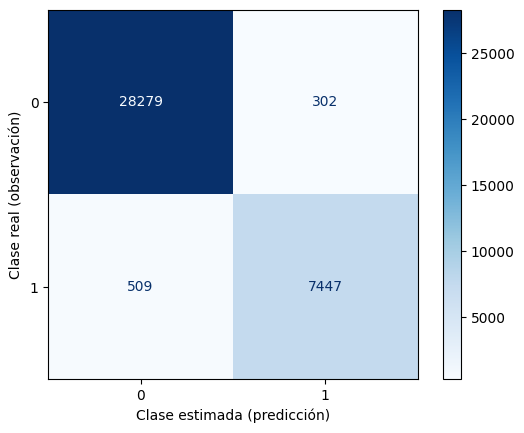

In [ ]:
grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c1.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 7447
Falsos positivos (FP): 302
Verdaderos negativos (VN): 28279
Falsos negativos (FN): 509


In [ ]:
#Tasa de error
Tasa_FP_1 = FP/(FP+VN)
Tasa_FN_1 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_1 )
print("Error tipo II: %.2f" % Tasa_FN_1 )

Error tipo I: 0.01
Error tipo II: 0.06


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Tabla resumen
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     28581
           1       0.96      0.94      0.95      7956

    accuracy                           0.98     36537
   macro avg       0.97      0.96      0.97     36537
weighted avg       0.98      0.98      0.98     36537



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy
SCORE_1 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_1 )

ACCURACY: 0.98


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#F1-Score
f1_1 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_1 )

F1-Score: 0.95


####**Modelo 2**

Se definen las variables a utilizar en este caso usaremos X e Y anteriormente definidas y Divididas en train y test.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(Xtrain)
Xtrain_sc= scaler.transform(Xtrain)

scaler.fit(Xtest)
Xtest_sc= scaler.transform(Xtest)

Creamos el modelo de Regresion Logistica.

In [ ]:
modelo_c2 = LogisticRegression(class_weight='balanced', random_state=123)

Entrenamos el modelo ajustandolo con Xtrain normalizado y Ytrain.

In [ ]:
modelo_c2.fit(Xtrain_sc, Ytrain)

LogisticRegression(class_weight='balanced', random_state=123)

Realizamos la prediccion utilzando la variable Xtest normalizado dandonos como resultado Yhat.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c2.predict(Xtest_sc)

Evaluamos el desempeño del modelo utilizando la matriz de confusion.

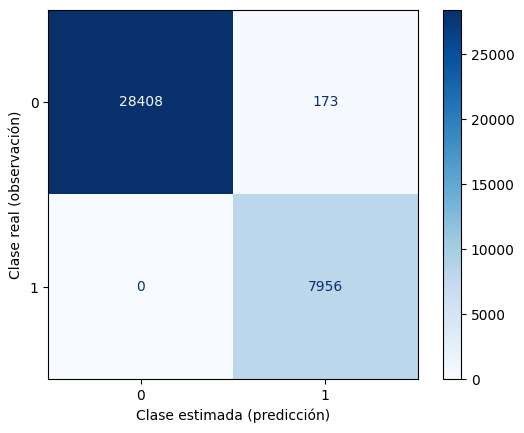

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c2.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 7956
Falsos positivos (FP): 173
Verdaderos negativos (VN): 28408
Falsos negativos (FN): 0


In [ ]:
#Tasa de error
Tasa_FP_2 = FP/(FP+VN)
Tasa_FN_2 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_2 )
print("Error tipo II: %.2f" % Tasa_FN_2 )

Error tipo I: 0.01
Error tipo II: 0.00


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28581
           1       0.98      1.00      0.99      7956

    accuracy                           1.00     36537
   macro avg       0.99      1.00      0.99     36537
weighted avg       1.00      1.00      1.00     36537



In [ ]:
#Accuracy
SCORE_2 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_2 )

#F1-Score
f1_2 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_2 )

ACCURACY: 1.00
F1-Score: 0.99


####**Modelo 3**

Se utilizan las variables ya establecidas y divididas.

Creamos el modelo de Regresion Logistica.

In [ ]:
modelo_c3 = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', class_weight={0: 1, 1: 5}, random_state=123)

Entrenamos el modelo ajustandolo con Xtrain normalizado y Ytrain.

In [ ]:
modelo_c3.fit(Xtrain_sc, Ytrain)

LogisticRegression(C=0.5, class_weight={0: 1, 1: 5}, penalty='l1',
                   random_state=123, solver='liblinear')

Obtenemos la variable Yhat.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c3.predict(Xtest_sc)

Evaluamos el desempeño del modelo utilizando la matriz de confusion.

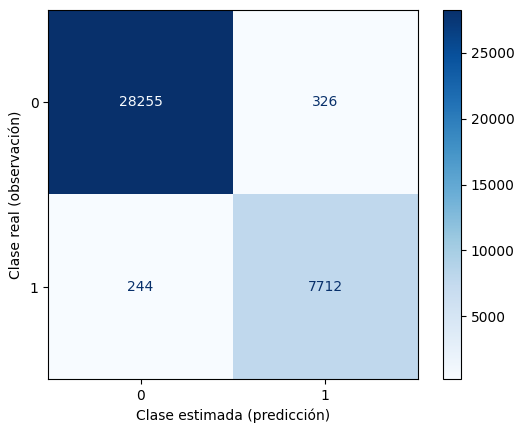

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c3.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 7712
Falsos positivos (FP): 326
Verdaderos negativos (VN): 28255
Falsos negativos (FN): 244


In [ ]:
#Tasa de error
Tasa_FP_3 = FP/(FP+VN)
Tasa_FN_3 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_3 )
print("Error tipo II: %.2f" % Tasa_FN_3 )

Error tipo I: 0.01
Error tipo II: 0.03


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28581
           1       0.96      0.97      0.96      7956

    accuracy                           0.98     36537
   macro avg       0.98      0.98      0.98     36537
weighted avg       0.98      0.98      0.98     36537



In [ ]:
#Accuracy
SCORE_3 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_3 )

#F1-Score
f1_3 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_3 )

ACCURACY: 0.98
F1-Score: 0.96


In [ ]:
tabla_Acurracy = pd.DataFrame({
                      'Modelo 1':[SCORE_1],
                      'Modelo 2':[SCORE_2],
                      'Modelo 3':[SCORE_3]})
print(tabla_Acurracy)


   Modelo 1  Modelo 2  Modelo 3
0  0.977803  0.995265  0.984399


###**2.2. Árbol de Decisión**

####**Modelo 4**

Se utilizan las variables previamente definidas,normalizadas y divididas.

Creamos el arbol de arbol de Clasificacion.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_c4 = DecisionTreeClassifier()

Entrenamos el modelo ajustandolo con xtrain y ytrain normalizadas.

In [ ]:
modelo_c4.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier()

Estimamos la variable Ytest usando Xtestnormalizado, dandonos asi Yhat.


In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c4.predict(Xtest_sc)

In [ ]:
Ytest = Ytest.rename(columns={'Estado': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion.head(10)

,Observación (Y),Estimación (Ŷ)
19424,1,0
9554,1,0
31393,0,0
24478,0,0
21051,0,0
27845,0,0
34739,0,0
19380,0,1
896,0,0
17886,0,1


In [ ]:
from sklearn import tree

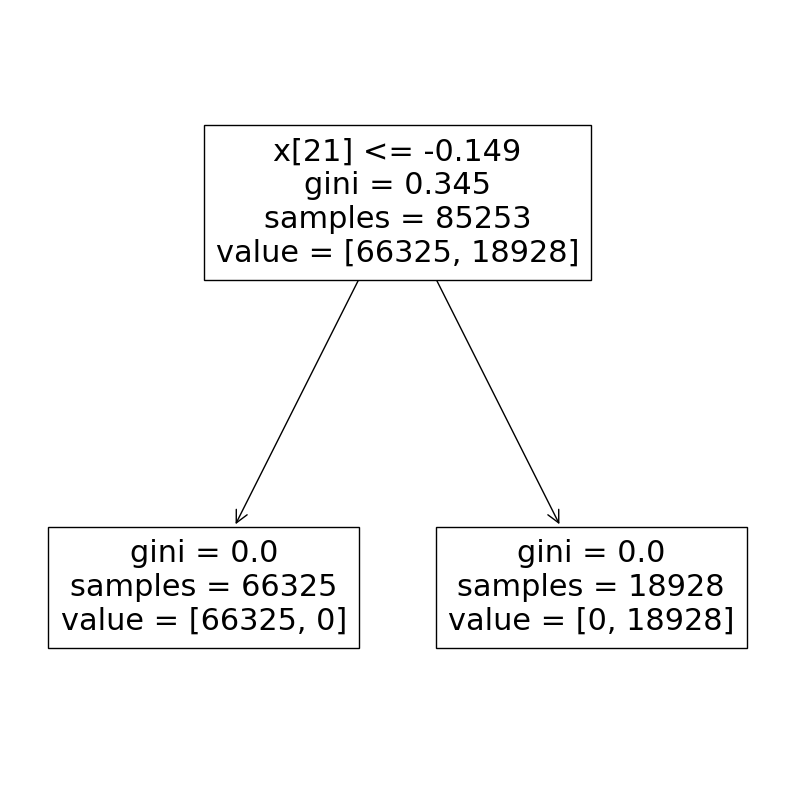

In [ ]:
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c4)

Evaluamos el modelo en base a las metricas y matriz de confusion.

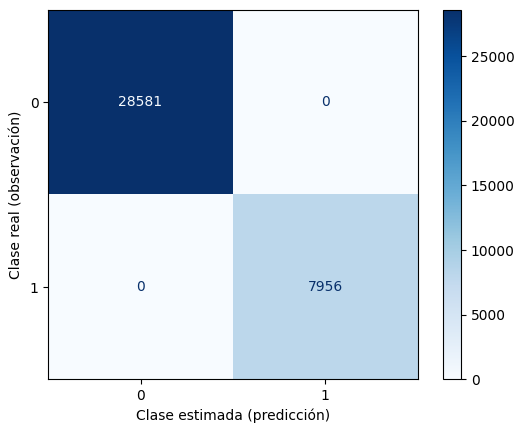

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c4.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 7956
Falsos positivos (FP): 0
Verdaderos negativos (VN): 28581
Falsos negativos (FN): 0


In [ ]:
#Tasa de error
Tasa_FP_4 = FP/(FP+VN)
Tasa_FN_4 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_4 )
print("Error tipo II: %.2f" % Tasa_FN_4 )

Error tipo I: 0.00
Error tipo II: 0.00


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28581
           1       1.00      1.00      1.00      7956

    accuracy                           1.00     36537
   macro avg       1.00      1.00      1.00     36537
weighted avg       1.00      1.00      1.00     36537



In [ ]:
#Accuracy
SCORE_4 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_4 )

#F1-Score
f1_4 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_4 )

ACCURACY: 1.00
F1-Score: 1.00


####**Modelo 5**

Creamos el modelo del Arbol de Clasificacion.

In [ ]:
modelo_c5 = DecisionTreeClassifier(max_depth=10, min_samples_split =3, min_samples_leaf=2, class_weight='balanced', random_state=123)

Entrenamos el modelo con Xtrain normalizado y Ytrain.

In [ ]:
modelo_c5.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=123)

Obtencion de Yhat.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c5.predict(Xtest_sc)

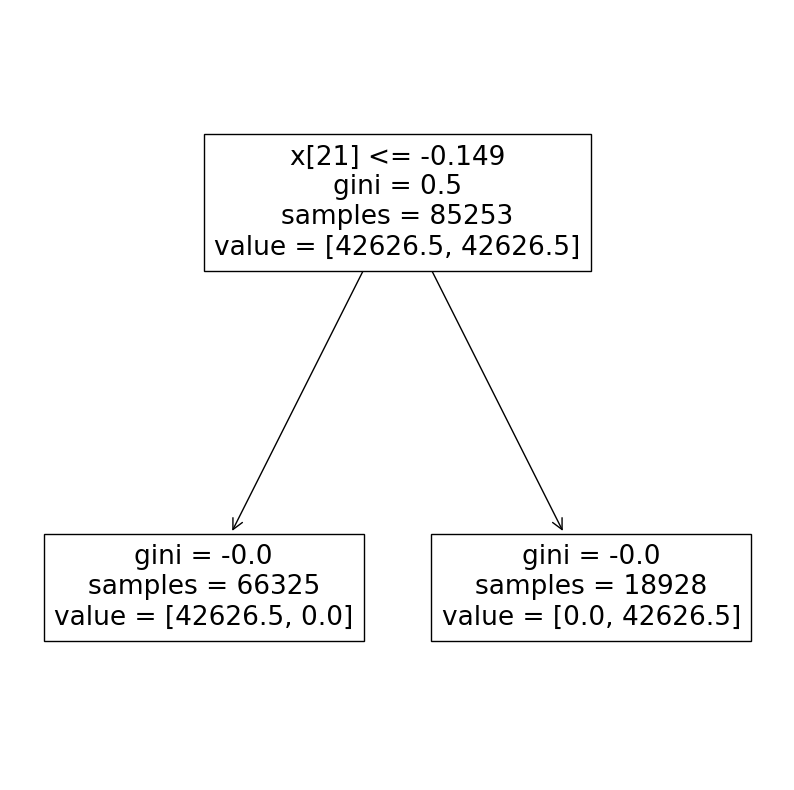

In [ ]:
#Grafico
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c5)

Evaluacion del Modelo en base a Metricas.

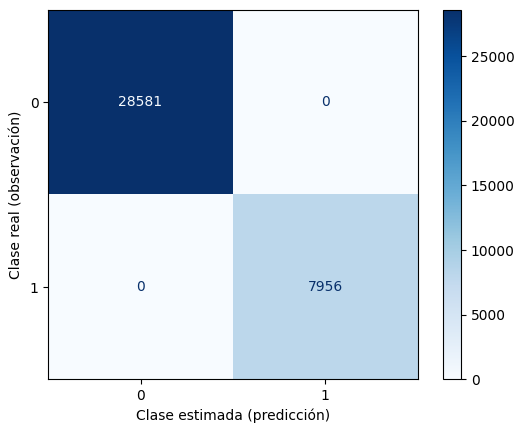

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c5.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 7956
Falsos positivos (FP): 0
Verdaderos negativos (VN): 28581
Falsos negativos (FN): 0


In [ ]:
#Tasa de error
Tasa_FP_5 = FP/(FP+VN)
Tasa_FN_5 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_5 )
print("Error tipo II: %.2f" % Tasa_FN_5 )

Error tipo I: 0.00
Error tipo II: 0.00


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28581
           1       1.00      1.00      1.00      7956

    accuracy                           1.00     36537
   macro avg       1.00      1.00      1.00     36537
weighted avg       1.00      1.00      1.00     36537



In [ ]:
#Accuracy
SCORE_5 = modelo_c5.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_5)

#F1-Score
f1_5 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_5)

ACCURACY: 1.00
F1-Score: 1.00


####**Modelo 6**

Para el modelo 6 usaremos GridSearch en busca de los mejores hiperparametros.

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo base con class_weight='balanced'
modelo = DecisionTreeClassifier(class_weight='balanced', random_state=123)

# Inicializar Grid Search con validación cruzada (CV) estratificada
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='accuracy')

# Ajustar Grid Search a los datos de entrenamiento
grid_search.fit(Xtrain_sc, Ytrain)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
best_params

Mejores hiperparámetros encontrados:


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
modelo_c6 = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features='auto',
                                   min_samples_leaf=1, min_samples_split=4, splitter='best',
                                   class_weight='balanced', random_state=123)

Entrenamos el modelo ajustandolo con Xtrain normalizado y Ytrain.

In [ ]:
modelo_c6.fit(Xtrain_sc, Ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_features='auto', min_samples_split=4,
                       random_state=123)

Estimacion de la variable Yhat.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c6.predict(Xtest_sc)

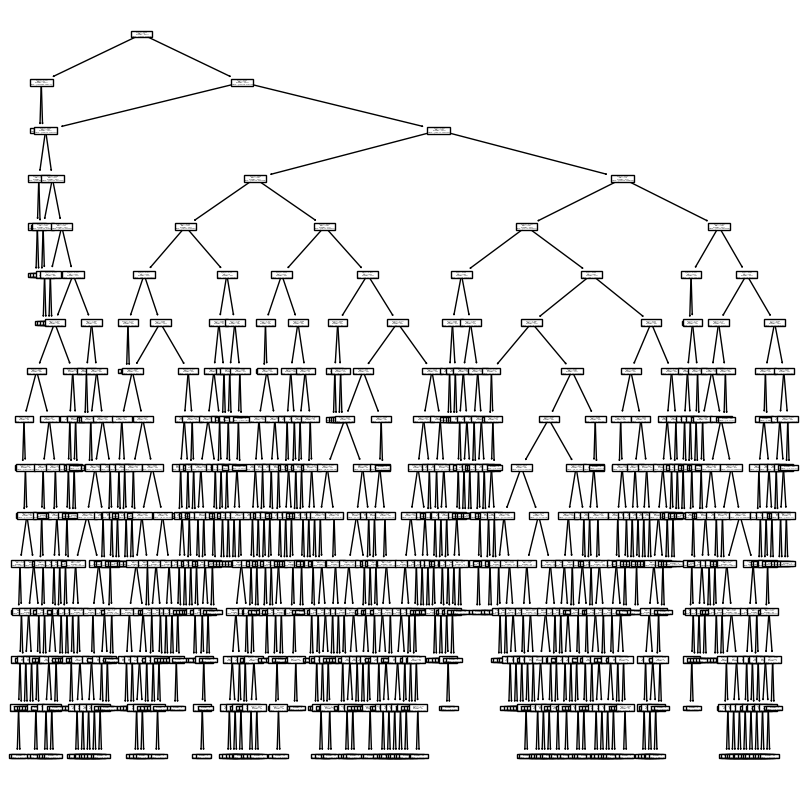

In [ ]:
#Grafico
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_c6)

Evaluamos las metricas.

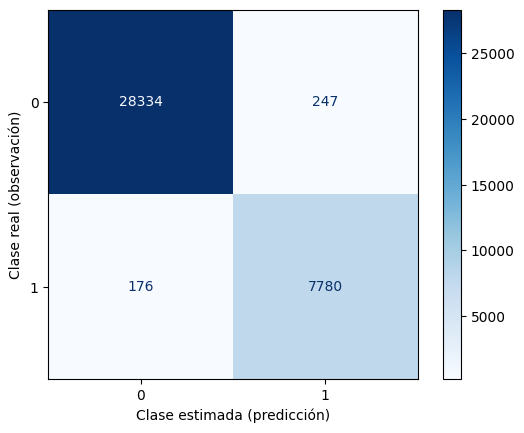

In [ ]:
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c6.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 7780
Falsos positivos (FP): 247
Verdaderos negativos (VN): 28334
Falsos negativos (FN): 176


In [ ]:
#Tasa de error
Tasa_FP_6 = FP/(FP+VN)
Tasa_FN_6 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_6 )
print("Error tipo II: %.2f" % Tasa_FN_6 )

Error tipo I: 0.01
Error tipo II: 0.02


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28581
           1       0.97      0.98      0.97      7956

    accuracy                           0.99     36537
   macro avg       0.98      0.98      0.98     36537
weighted avg       0.99      0.99      0.99     36537



In [ ]:
#Accuracy
SCORE_6 = modelo_c6.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_6)

#F1-Score
f1_6 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_6)

ACCURACY: 0.99
F1-Score: 0.97


In [ ]:
tabla_AcurracyArbol = pd.DataFrame({
                      'Modelo 4':[SCORE_4],
                      'Modelo 5':[SCORE_5],
                      'Modelo 6':[SCORE_6]})
print(tabla_AcurracyArbol)

joblib.dump(modelo_c6,'ArbolClasificacion.pkl')

   Modelo 4  Modelo 5  Modelo 6
0       1.0       1.0  0.988423


['ArbolClasificacion.pkl']

#**ETAPA IV: Modelamiento No Supervisados**

In [ ]:
pip install kneed

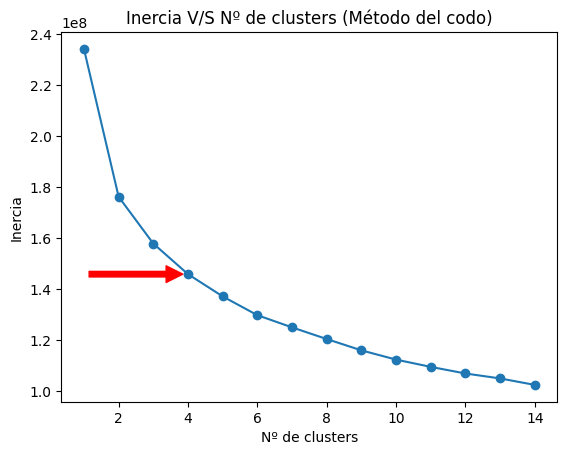

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Calcular la inercia para diferentes números de clusters
inercia = []
for i in range(1, 15):  # Rango de clusters
    modelok0 = KMeans(n_clusters=i, random_state=0)
    modelok0.fit(df)
    inercia.append(modelok0.inertia_)

# Utilizar la biblioteca kneed para encontrar el "codo" de forma automática
kl = KneeLocator(range(1, 15), inercia, curve='convex', direction='decreasing')
codo_idx = kl.elbow

# Graficar la inercia
plt.plot(range(1, 15), inercia, marker='o')
plt.title('Inercia V/S Nº de clusters (Método del codo)')
plt.xlabel('Nº de clusters')
plt.ylabel('Inercia')

# Añadir ubicacion del codo
plt.annotate('', xy=(codo_idx, inercia[codo_idx-1]),
             xytext=(codo_idx - 3, inercia[codo_idx-1] + 500),
             arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05))

plt.show()

### **Modelo 1**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121790 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121790 non-null  int64  
 1   MinTemp        121790 non-null  float64
 2   MaxTemp        121790 non-null  float64
 3   Rainfall       121790 non-null  float64
 4   Evaporation    121790 non-null  float64
 5   Sunshine       121790 non-null  float64
 6   WindGustDir    121790 non-null  int64  
 7   WindGustSpeed  121790 non-null  float64
 8   WindDir9am     121790 non-null  int64  
 9   WindDir3pm     121790 non-null  int64  
 10  WindSpeed9am   121790 non-null  float64
 11  WindSpeed3pm   121790 non-null  float64
 12  Humidity9am    121790 non-null  float64
 13  Humidity3pm    121790 non-null  float64
 14  Pressure9am    121790 non-null  float64
 15  Pressure3pm    121790 non-null  float64
 16  Cloud9am       121790 non-null  float64
 17  Cloud3pm       121790 non-null  fl

In [ ]:
X = df.iloc[:, [1,12]].values

In [ ]:
from sklearn.cluster import KMeans

modelok1 = KMeans(n_clusters= 5, random_state=0)

In [ ]:
Y_hat = modelok1.fit_predict(X)

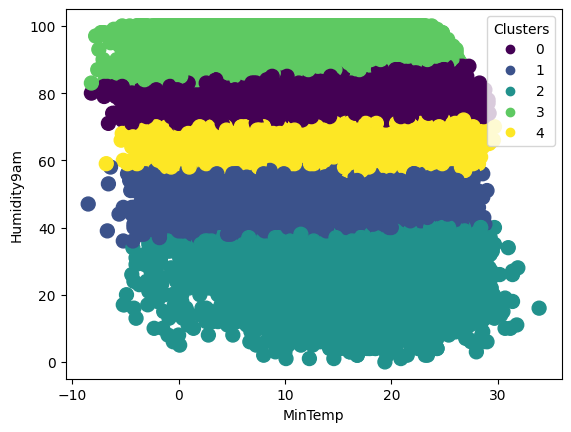

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('MinTemp')
plt.ylabel('Humidity9am')
plt.title('')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
SS_1 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_1)

Silhouette Score: 0.35104779296404004


### **Modelo 2**

Seleccion de Variables

In [ ]:
X = df.iloc[:, [1,14]].values

Modelado,

In [ ]:
modelok2 = KMeans(n_clusters= 5, random_state=0)

Prediccion

In [ ]:
Y_hat = modelok2.fit_predict(X)

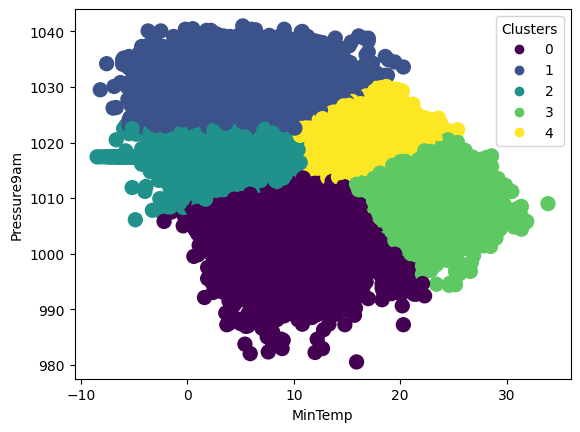

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('MinTemp')
plt.ylabel('Pressure9am')
plt.title('')
# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [ ]:
SS_2 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_2)

Silhouette Score: 0.35006438027155284


### **Modelo 3**

Seleccionamos las variables.

In [ ]:
X = df.iloc[:, [2,3]].values

Modelado

In [ ]:
modelok3 = KMeans(n_clusters= 5, random_state=0)

Prediccion.

In [ ]:
Y_hat = modelok3.fit_predict(X)

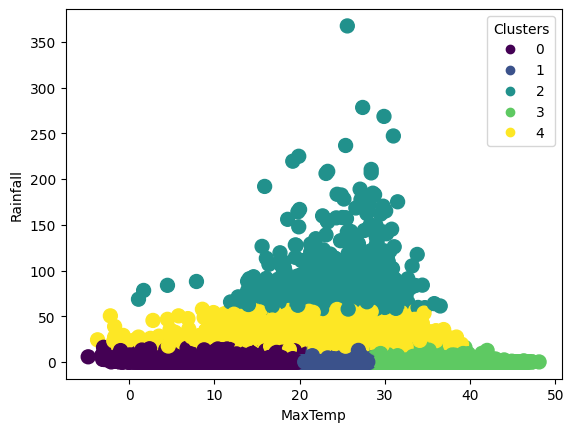

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.title('')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [ ]:
SS_3 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_3)

Silhouette Score: 0.4593526385288636


### **Modelo 4**

Se utilizan las mismas variables que en el modelo anterior

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define el espacio de búsqueda de hiperparámetros, incluyendo otros hiperparámetros además de n_clusters e init
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7,9,10,11,12],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Crea un modelo K-Means
modelok4 = KMeans()

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelok4, param_grid, cv=5, scoring=silhouette_score, n_jobs=2)
grid_search.fit(X)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

best_n_clusters = grid_search.best_params_['n_clusters']
best_init = grid_search.best_params_['init']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(f"Número de clústeres (n_clusters): {best_n_clusters}")
print(f"Método de inicialización (init): {best_init}")
print(f'Maximum number of iterations for each run (max_iter): {best_max_iter}')
print(f'Tolerance (tol): {best_tol}')

Mejores hiperparámetros encontrados:
Número de clústeres (n_clusters): 3
Método de inicialización (init): k-means++
Maximum number of iterations for each run (max_iter): 100
Tolerance (tol): 0.0001


In [ ]:
# Crea un modelo con los mejores hiperparámetros
modelok4 = KMeans(**best_params, random_state=0)

In [ ]:
Y_hat = modelok4.fit_predict(X)

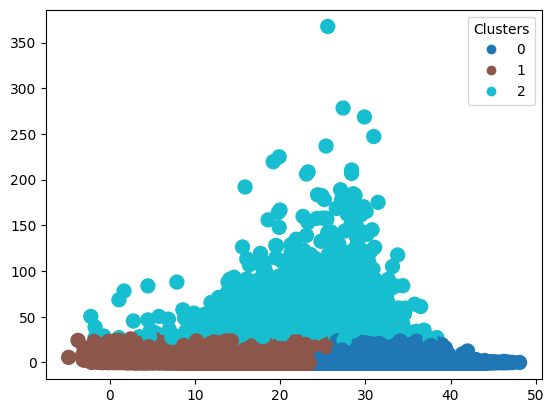

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [ ]:
SS_4 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SS_4)

Silhouette Score: 0.4979305810254348


### **Modelo 5**

Seleccion de Variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalización de los datos
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA
# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df_sc)

Modelado

In [ ]:
modelok5 = KMeans(n_clusters=5, random_state=0)

Prediccion

In [ ]:
Y_hat = modelok5.fit_predict(X_PCA)

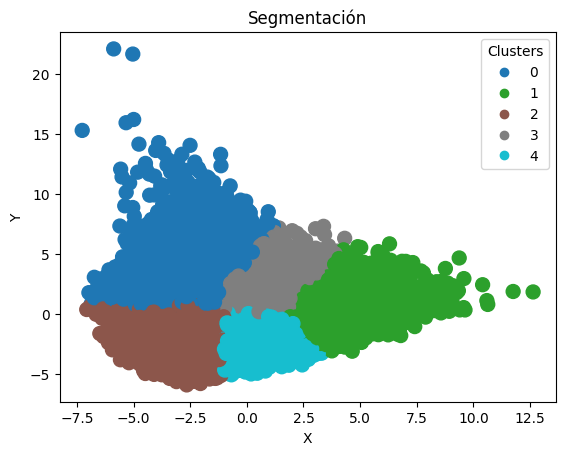

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Segmentación')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

Evaluamos el desempeño:

In [ ]:
SS_5 = silhouette_score(X_PCA, Y_hat)

print("Silhouette Score:", SS_5)

Silhouette Score: 0.33287965674845066


In [ ]:
tabla_SilhouetteScore = pd.DataFrame({
                      'Modelo 1':[SS_1],
                      'Modelo 2':[SS_2],
                      'Modelo 3':[SS_3],
                      'Modelo 4':[SS_4],
                      'Modelo 5':[SS_5]})
print(tabla_SilhouetteScore)


   Modelo 1  Modelo 2  Modelo 3  Modelo 4  Modelo 5
0  0.351048  0.350064  0.459353  0.497931   0.33288


#Prediccion

Realizaremos la prediccion con de claasificacion usando uno de los modelos que mejor desempeño nos dio.

In [ ]:
data = pd.read_csv("weatherAUS.csv")
X = df.drop(columns=['RainTomorrow'])
X.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Año,Mes,Dia
73072,26,8.7,26.2,0.0,5.80,12.80,9,30.0,9,15,...,1017.0,3.0,1.0,16.3,25.7,0,0.0,2009,11,13
18096,7,21.1,28.4,39.8,5.52,8.48,7,43.0,7,4,...,1011.0,6.0,4.0,23.2,25.7,1,0.0,2010,3,6
104814,36,13.5,28.4,0.0,5.60,10.00,12,35.0,15,1,...,1016.4,0.0,0.0,18.6,27.8,0,0.0,2014,4,19
9289,4,20.8,23.0,34.2,4.20,0.00,16,28.0,8,13,...,1019.8,8.0,8.0,22.2,21.1,1,38.8,2009,12,30
58311,20,2.3,12.5,0.0,0.60,2.46,6,20.0,9,6,...,1026.0,8.0,8.0,6.0,12.3,0,0.0,2013,7,26


Generamos datos aleatorios dentro de un rango.

In [ ]:
def generate_random_data(num_rows):
    np.random.seed(123) #Puedes quitar la semilla para probar con distintos resultados aleatorios
    random_data = {
        key: np.random.randint(low, high, size=num_rows) for key, low, high in [
            ('Location', X['Location'].min(), X['Location'].max()+1),
            ('MinTemp', X['MinTemp'].min(), X['MinTemp'].max()+1),
            ('MaxTemp', X['MaxTemp'].min(), X['MaxTemp'].max()+1),
            ('Rainfall', X['Rainfall'].min(), X['Rainfall'].max()+1),
            ('Evaporation', X['Evaporation'].min(), X['Evaporation'].max()+1),
            ('Sunshine', X['Sunshine'].min(), X['Sunshine'].max()+1),
            ('WindGustDir',X['WindGustDir'].min(), X['WindGustDir'].max()+1),
            ('WindGustSpeed',X['WindGustSpeed'].min(), X['WindGustSpeed'].max()+1),
            ('WindDir9am',X['WindDir9am'].min(), X['WindDir9am'].max()+1),
            ('WindDir3pm',X['WindDir3pm'].min(), X['WindDir3pm'].max()+1),
            ('WindSpeed9am',X['WindSpeed9am'].min(), X['WindSpeed9am'].max()+1),
            ('WindSpeed3pm',X['WindSpeed3pm'].min(), X['WindSpeed3pm'].max()+1),
            ('Humidity9am',X['Humidity9am'].min(), X['Humidity9am'].max()+1),
            ('Humidity3pm',X['Humidity3pm'].min(), X['Humidity3pm'].max()+1),
            ('Pressure9am',X['Pressure9am'].min(), X['Pressure9am'].max()+1),
            ('Pressure3pm',X['Pressure3pm'].min(), X['Pressure3pm'].max()+1),
            ('Cloud9am',X['Cloud9am'].min(), X['Cloud9am'].max()+1),
            ('Cloud3pm',X['Cloud3pm'].min(), X['Cloud3pm'].max()+1),
            ('Temp9am',X['Temp9am'].min(), X['Temp9am'].max()+1),
            ('Temp3pm',X['Temp3pm'].min(), X['Temp3pm'].max()+1),
            ('RainToday',X['RainToday'].min(), X['RainToday'].max()+1),
            ('RISK_MM',X['RISK_MM'].min(), X['RISK_MM'].max()+1),
            ('Año',X['Año'].min(), X['Año'].max()+1),
            ('Mes',X['Mes'].min(), X['Mes'].max()+1),
            ('Dia',X['Dia'].min(), X['Dia'].max()+1)
        ]
    }

    X_rand = pd.DataFrame(random_data)

    return X_rand

X_rand = generate_random_data(10)
X_rand.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Año,Mes,Dia
0,46,24,0,135,27,10,5,110,13,12,...,1017,1,8,30,12,1,312,2012,3,9
1,3,1,45,361,34,6,7,50,6,6,...,1001,6,7,-5,-2,1,343,2016,6,22
2,29,24,-1,99,76,13,14,108,10,10,...,1029,8,1,11,6,1,100,2009,2,1
3,35,24,-2,348,40,2,4,32,1,8,...,1035,7,3,39,21,0,325,2017,8,26
4,39,17,16,180,3,4,11,63,9,10,...,1035,9,1,38,23,1,112,2011,6,4
5,18,11,35,358,69,11,1,56,12,3,...,1022,1,8,28,6,1,312,2010,10,4
6,20,6,-2,353,64,11,7,19,2,4,...,990,7,7,11,5,1,60,2007,2,20
7,43,28,16,213,75,13,15,25,7,12,...,985,1,5,20,-2,0,137,2010,11,2
8,23,24,43,118,34,12,16,8,4,4,...,991,7,1,39,40,1,194,2014,3,8
9,34,8,44,350,58,14,5,58,4,4,...,983,9,2,2,18,1,161,2014,11,7


Carga del Modelo Ganador y Yhat con modelo Ganador.



In [ ]:
ArbolClasificacion = joblib.load('ArbolClasificacion.pkl')
Yhat = ArbolClasificacion.predict(X_rand)

Resultado Prediccion:

In [ ]:
ArbolResult = pd.DataFrame(X_rand)
ArbolResult['RainTomorrow'] = Yhat
ArbolResult

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Año,Mes,Dia,RainTomorrow
0,46,24,0,135,27,10,5,110,13,12,...,1,8,30,12,1,312,2012,3,9,1
1,3,1,45,361,34,6,7,50,6,6,...,6,7,-5,-2,1,343,2016,6,22,1
2,29,24,-1,99,76,13,14,108,10,10,...,8,1,11,6,1,100,2009,2,1,1
3,35,24,-2,348,40,2,4,32,1,8,...,7,3,39,21,0,325,2017,8,26,0
4,39,17,16,180,3,4,11,63,9,10,...,9,1,38,23,1,112,2011,6,4,1
5,18,11,35,358,69,11,1,56,12,3,...,1,8,28,6,1,312,2010,10,4,1
6,20,6,-2,353,64,11,7,19,2,4,...,7,7,11,5,1,60,2007,2,20,1
7,43,28,16,213,75,13,15,25,7,12,...,1,5,20,-2,0,137,2010,11,2,1
8,23,24,43,118,34,12,16,8,4,4,...,7,1,39,40,1,194,2014,3,8,1
9,34,8,44,350,58,14,5,58,4,4,...,9,2,2,18,1,161,2014,11,7,1


### **Patrones**
Pudimos apreciar las siguientes predicciones gracias a la correlacion de las columnas:

- RainToday y RainTomorrow debido a su correlacion podemos indicar que hay una gran probabilidad de si llueve hoy que mañana tambien llueva o siga lloviendo.
- MaxTemp y Temp3PM debido a su correlacion podemos indicar que la temperatura a las 3 PM suele ser la temperatura maxima del dia.
-MinTemp y Temp9AM debido a su correlacion nos puede indicar que la temperatura a las 9 AM suele ser la temperatura minima del dia.


### **Predicciones Posibles**
Pudimos apreciar las siguientes predicciones gracias a la correlacion de las columnas:

- Gracias a la correlacion podriamos predecir la temperatura maxima del dia con las variables de (MaxTemp - Temp3PM)
- Gracias a la correlacion podriamos predecir la temperatura minima del dia con las variables de (MinTemp - Temp9AM)
- Gracias a la correlacion podriamos predecir el nivel de humedad de la tarde con las variables de (Humidity9AM - Humidity3PM)
- Gracias a la correlacion podriamos predecir la nubosidad de la tarde con las variables de (Cloud9AM - Cloud3PM)
